In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv('used_car_dataset.csv', encoding='utf-8')  


In [55]:
df.head()

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,"98,000 km",Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...","₹ 1,95,000"
1,Toyota,Innova,2009,15,190000.0 km,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...","₹ 3,75,000"
2,Volkswagen,VentoTest,2010,14,"77,246 km",Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...","₹ 1,84,999"
3,Maruti Suzuki,Swift,2017,7,"83,500 km",Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,"₹ 5,65,000"
4,Maruti Suzuki,Baleno,2019,5,"45,000 km",Automatic,first,Petrol,Nov-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol","₹ 6,85,000"


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9582 non-null   object
 1   model         9582 non-null   object
 2   Year          9582 non-null   int64 
 3   Age           9582 non-null   int64 
 4   kmDriven      9535 non-null   object
 5   Transmission  9582 non-null   object
 6   Owner         9582 non-null   object
 7   FuelType      9582 non-null   object
 8   PostedDate    9582 non-null   object
 9   AdditionInfo  9582 non-null   object
 10  AskPrice      9582 non-null   object
dtypes: int64(2), object(9)
memory usage: 823.6+ KB


In [57]:
df.isnull().sum()

Brand            0
model            0
Year             0
Age              0
kmDriven        47
Transmission     0
Owner            0
FuelType         0
PostedDate       0
AdditionInfo     0
AskPrice         0
dtype: int64

In [58]:
df=df.dropna(subset=['kmDriven'])

In [59]:
df.isnull().sum()

Brand           0
model           0
Year            0
Age             0
kmDriven        0
Transmission    0
Owner           0
FuelType        0
PostedDate      0
AdditionInfo    0
AskPrice        0
dtype: int64

# changing data type of ask price as float to plot the graph

In [60]:
# Remove rupee symbol and commas, convert to float
df['AskPrice'] = df['AskPrice'].replace('[₹,â‚¹]', '', regex=True).astype(float)


In [61]:
print(df['AskPrice'].head(10))


0     195000.0
1     375000.0
2     184999.0
3     565000.0
4     685000.0
5    1350000.0
6    1025000.0
7    5950000.0
8     622000.0
9     649000.0
Name: AskPrice, dtype: float64


In [62]:
# Create a new column with price in lakhs
df['AskPrice_Lakhs'] = df['AskPrice'] / 100000

# Define price bins and labels
price_bins = [0, 2, 4, 6, 8, 10, 20, 50, 100, df['AskPrice_Lakhs'].max()]
bin_labels = ['0-2L', '2-4L', '4-6L', '6-8L', '8-10L', '10-20L', '20-50L', '50-100L', '100L+']

# Create a binned column
df['PriceRange'] = pd.cut(df['AskPrice_Lakhs'], bins=price_bins, labels=bin_labels, right=False)

# Count how many cars fall in each range
price_range_counts = df['PriceRange'].value_counts().sort_index()

# Display result
print(price_range_counts)


PriceRange
0-2L        844
2-4L       1957
4-6L       1975
6-8L       1308
8-10L       745
10-20L     1658
20-50L      812
50-100L     176
100L+        59
Name: count, dtype: int64


# 1.DISTRIBUTION OF CAR PRICES

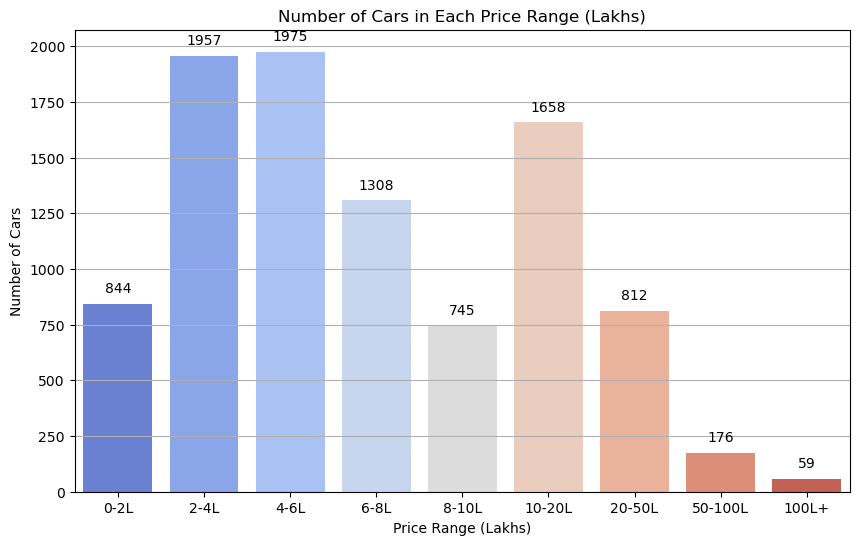

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=price_range_counts.index, y=price_range_counts.values, palette='coolwarm')

plt.title('Number of Cars in Each Price Range (Lakhs)')
plt.xlabel('Price Range (Lakhs)')
plt.ylabel('Number of Cars')

# Add value labels
for i, count in enumerate(price_range_counts.values):
    plt.text(i, count + 50, str(count), ha='center')

plt.grid(axis='y')
plt.show()


# 2. Top 10 Most Common Car Brands

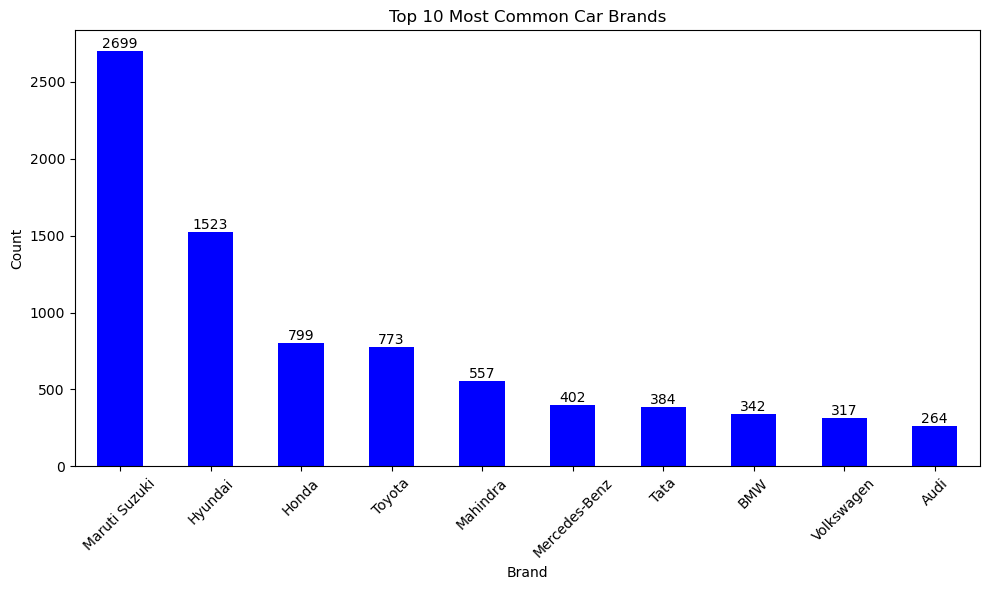

In [64]:
plt.figure(figsize=(10,6))

# Create the bar plot and capture the Axes object
ax = df['Brand'].value_counts().head(10).plot(kind='bar', color='blue')

plt.title('Top 10 Most Common Car Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add count labels on top of each bar
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()


# 3. Car Price vs. Age

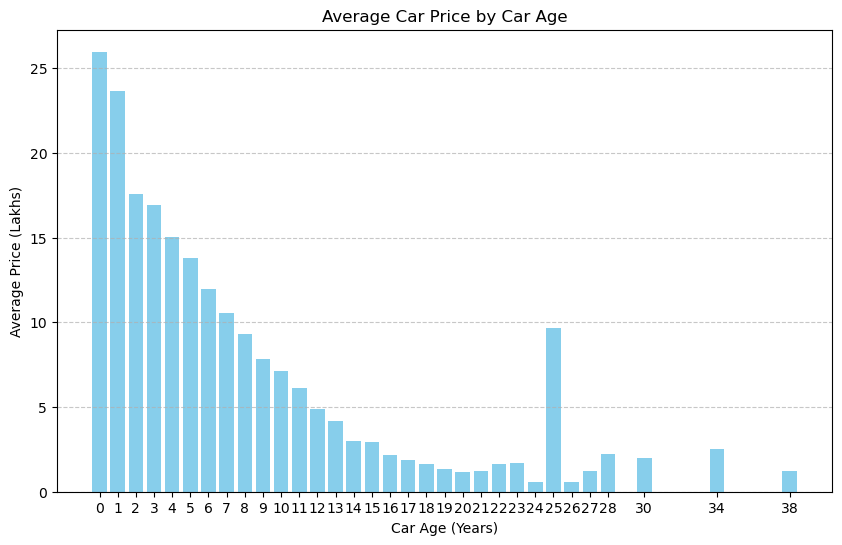

In [65]:
import matplotlib.pyplot as plt

# Calculate average price by car age
avg_price_by_age = df.groupby('Age')['AskPrice_Lakhs'].mean()

# Plot bar chart
plt.figure(figsize=(10,6))
plt.bar(avg_price_by_age.index, avg_price_by_age.values, color='skyblue')
plt.title('Average Car Price by Car Age')
plt.xlabel('Car Age (Years)')
plt.ylabel('Average Price (Lakhs)')
plt.xticks(avg_price_by_age.index)  # Show all ages on x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# 4. Average Price by Fuel Type


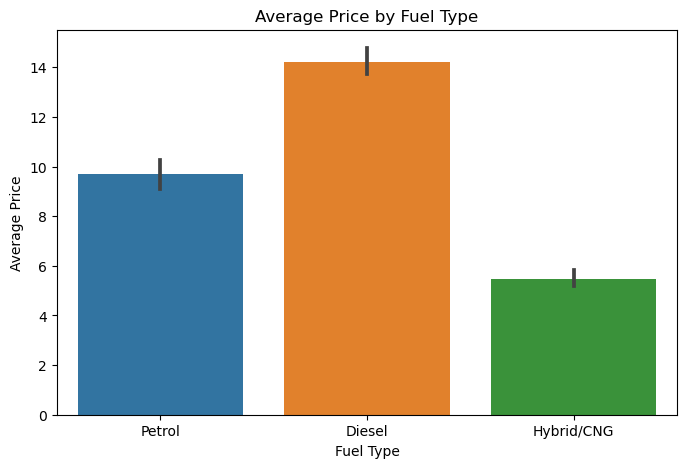

In [68]:
plt.figure(figsize=(8,5))
sns.barplot(x='FuelType', y='AskPrice_Lakhs', data=df)
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.show()


# Code to Flag Good-Value Cars:

In [22]:
# 1. Model-wise average price and kmDriven
model_avg = df.groupby('model')[['AskPrice', 'kmDriven']].mean().reset_index()
model_avg.columns = ['model', 'avg_price', 'avg_km']

In [23]:
# 2. Merge with original DataFrame
df = df.merge(model_avg, on='model', how='left')

In [24]:
# 3. Calculate median age
median_age = df['Age'].median()

In [25]:
# 4. Flag good-value cars
df['GoodValue'] = (
    (df['AskPrice'] < df['avg_price']) &
    (df['kmDriven'] < df['avg_km']) &
    (df['Age'] <= median_age)
)

# View Good-Value Cars

In [26]:
# Show top good-value cars sorted by price
good_cars = df[df['GoodValue']].sort_values(by='AskPrice')
good_cars[['Brand', 'model', 'Year', 'Age', 'kmDriven', 'AskPrice']]


,Brand,model,Year,Age,kmDriven,AskPrice
3020,Maruti Suzuki,Baleno,2024,0,9000.0,18500.0
5638,Maruti Suzuki,Wagon-R,2020,4,68000.0,49999.0
6694,Volkswagen,Ameo,2017,7,83000.0,50000.0
7344,Maruti Suzuki,Fronx,2024,0,8000.0,100000.0
9430,Maruti Suzuki,Celerio,2023,1,1234.0,130000.0
...,...,...,...,...,...,...
3303,Mercedes-Benz,GLS,2018,6,59950.0,6211000.0
5442,Mercedes-Benz,GLS,2018,6,54855.0,6750000.0
5117,Porsche,Panamera,2017,7,16800.0,6900000.0
8484,Land Rover,Range Rover Sport,2019,5,64000.0,7900000.0


# Only diesel cars

In [27]:
diesel_cars = good_cars[good_cars['FuelType'].str.lower() == 'diesel']
diesel_cars

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice,avg_price,avg_km,GoodValue
6694,Volkswagen,Ameo,2017,7,83000.0,Automatic,first,Diesel,Nov-24,Only for VW lovers,50000.0,4.914429e+05,84026.214286,True
1903,Mahindra,Bolero,2017,7,3.0,Manual,first,Diesel,Nov-24,Mahindra Bolero 2017 Diesel 3 Km Driven,350000.0,6.488682e+05,76203.304348,True
8107,Honda,Amaze,2018,6,42000.0,Manual,second,Diesel,Nov-24,"Honda Amaze 1.2 SMT I VTEC, 2018, Diesel",375000.0,5.050628e+05,71178.580420,True
7080,Ford,Free Style,2019,5,51000.0,Manual,first,Diesel,Nov-24,"Ford Freestyle, 2019, Diesel",395000.0,4.580000e+05,76666.666667,True
5453,Maruti Suzuki,Vitara-Brezza,2019,5,65000.0,Manual,first,Diesel,Nov-24,Maruti Suzuki Vitara Brezza 2017 Diesel 65000 ...,399999.0,7.612912e+05,71787.975309,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,Mercedes-Benz,GLS,2017,7,53000.0,Automatic,first,Diesel,Nov-24,"Mercedes-Benz GLS 350d 4MATIC, 2017, Diesel",5175111.0,6.997687e+06,61325.409091,True
3303,Mercedes-Benz,GLS,2018,6,59950.0,Automatic,first,Diesel,Nov-24,Mercedes Benz GLS GRAND EDITION,6211000.0,6.997687e+06,61325.409091,True
5442,Mercedes-Benz,GLS,2018,6,54855.0,Automatic,first,Diesel,Nov-24,"Mercedes-Benz GLS 350d 4MATIC, 2018, Diesel",6750000.0,6.997687e+06,61325.409091,True
5117,Porsche,Panamera,2017,7,16800.0,Automatic,second,Diesel,Nov-24,"Porsche Panamera Diesel, 2017, Diesel",6900000.0,1.095000e+07,18400.000000,True


# only automatic cars

In [28]:
automatic_cars = good_cars[good_cars['Transmission'].str.lower() == 'automatic']
automatic_cars

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice,avg_price,avg_km,GoodValue
6694,Volkswagen,Ameo,2017,7,83000.0,Automatic,first,Diesel,Nov-24,Only for VW lovers,50000.0,4.914429e+05,84026.214286,True
6275,Maruti Suzuki,Swift-Dzire,2024,0,1234.0,Automatic,first,Hybrid/CNG,Nov-24,"Maruti Suzuki Swift Dzire Tour S, 2024, CNG & ...",150000.0,4.662097e+05,79973.539823,True
5919,Maruti Suzuki,Swift-Dzire-Tour,2020,4,66000.0,Automatic,second,Hybrid/CNG,Nov-24,Maruti Suzuki Swift Dzire Tour 2020 petrol and...,150000.0,4.234000e+05,120333.100000,True
8997,Maruti Suzuki,Swift Dzire,2024,0,36.0,Automatic,first,Hybrid/CNG,Nov-24,"Maruti Suzuki Swift Dzire, 2024, CNG & Hybrids",187000.0,5.317222e+05,59603.944444,True
3393,Datsun,GO,2019,5,70000.0,Automatic,second,Petrol,Nov-24,Datsun Go ML 05 S 2019 Model,190000.0,2.443746e+05,73700.000000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3303,Mercedes-Benz,GLS,2018,6,59950.0,Automatic,first,Diesel,Nov-24,Mercedes Benz GLS GRAND EDITION,6211000.0,6.997687e+06,61325.409091,True
5442,Mercedes-Benz,GLS,2018,6,54855.0,Automatic,first,Diesel,Nov-24,"Mercedes-Benz GLS 350d 4MATIC, 2018, Diesel",6750000.0,6.997687e+06,61325.409091,True
5117,Porsche,Panamera,2017,7,16800.0,Automatic,second,Diesel,Nov-24,"Porsche Panamera Diesel, 2017, Diesel",6900000.0,1.095000e+07,18400.000000,True
8484,Land Rover,Range Rover Sport,2019,5,64000.0,Automatic,first,Diesel,Oct-24,"Land Rover Range Sport SDV6 SE, 2019, Diesel",7900000.0,8.471154e+06,64696.153846,True


# Both automatic and diesel cars

In [29]:
disel_auto_cars=good_cars[(good_cars['FuelType'].str.lower()=='diesel')
                                     &
                           (good_cars['Transmission'].str.lower()=='automatic')           
                           
                           ]

In [30]:
disel_auto_cars

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice,avg_price,avg_km,GoodValue
6694,Volkswagen,Ameo,2017,7,83000.0,Automatic,first,Diesel,Nov-24,Only for VW lovers,50000.0,4.914429e+05,84026.214286,True
3609,Mahindra,Bolero,2022,2,55800.0,Automatic,second,Diesel,Nov-24,Mahindra Bolero 2022 Diesel Good Condition,590000.0,6.488682e+05,76203.304348,True
3254,Hyundai,Verna,2017,7,70000.0,Automatic,first,Diesel,Nov-24,"Hyundai Verna 2016-2017 1.6 CRDI AT SX Option,...",650000.0,6.657647e+05,70996.424837,True
2193,Maruti Suzuki,Vitara Brezza,2019,5,35000.0,Automatic,second,Diesel,Nov-24,"Maruti Suzuki Vitara Brezza VDI(O) AMT, 2019, ...",675000.0,7.337999e+05,56831.100000,True
8663,Maruti Suzuki,Vitara Brezza,2019,5,35000.0,Automatic,second,Diesel,Nov-24,"Maruti Suzuki Vitara Brezza VDI(O) AMT, 2019, ...",675000.0,7.337999e+05,56831.100000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,Mercedes-Benz,GLS,2017,7,53000.0,Automatic,first,Diesel,Nov-24,"Mercedes-Benz GLS 350d 4MATIC, 2017, Diesel",5175111.0,6.997687e+06,61325.409091,True
3303,Mercedes-Benz,GLS,2018,6,59950.0,Automatic,first,Diesel,Nov-24,Mercedes Benz GLS GRAND EDITION,6211000.0,6.997687e+06,61325.409091,True
5442,Mercedes-Benz,GLS,2018,6,54855.0,Automatic,first,Diesel,Nov-24,"Mercedes-Benz GLS 350d 4MATIC, 2018, Diesel",6750000.0,6.997687e+06,61325.409091,True
5117,Porsche,Panamera,2017,7,16800.0,Automatic,second,Diesel,Nov-24,"Porsche Panamera Diesel, 2017, Diesel",6900000.0,1.095000e+07,18400.000000,True


#  Count of Good-Value Cars per Brand

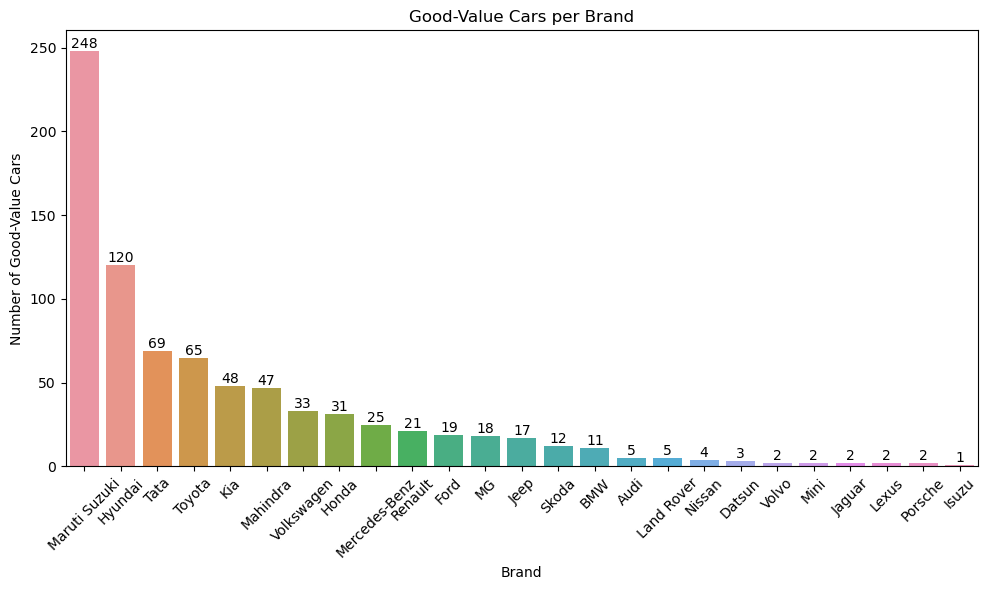

In [33]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=good_cars, x='Brand', order=good_cars['Brand'].value_counts().index)
plt.title('Good-Value Cars per Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Good-Value Cars')
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.show()

# 📌 Final Summary: Used Car Data Analysis

- 🔍 **Objective**: To analyze used car listings and identify "Good-Value" cars based on price, kilometers driven, and age.
- 🧼 **Data Cleaning**: Handled missing values, removed text/symbols from numeric columns, and converted data types correctly.
- 📊 **Exploratory Data Analysis (EDA)**:
  - Analyzed price distribution using histograms.
  - Compared average prices by brand and fuel type.
  - Visualized how age and kilometers driven affect price.
- 🧠 **Good-Value Car Logic**:
  - Defined as cars priced below the model's average,
    driven less than average, and not older than the median age.
- ✅ **Recommendations**:
  - Flagged and sorted good-value cars for easy filtering.
  - Visualized brands that offer the most good-value cars.
- 📦 **Outcome**: Created a data-driven system that can help users identify affordable and well-maintained used cars.

